# 1. 
# In ‘train.mat,’ you can find 2-D points X=[x1, x2] and their corresponding labels Y=y. 

## load and observe data

(70, 3) (70, 1)


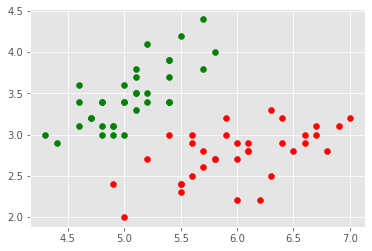

In [56]:
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
train = scipy.io.loadmat('train.mat') 
train_x = np.concatenate((train['x1'],train['x2']), axis=1)
train_X = PolynomialFeatures(degree=1).fit_transform(train_x)
train_y = train['y']
test = scipy.io.loadmat('test.mat') 
test_x = np.concatenate((test['x1'],test['x2']), axis=1)
test_X = PolynomialFeatures(degree=1).fit_transform(test_x)
test_y = test['y']

print(train_X.shape, train_y.shape)
plt.scatter(train['x1'][:35], train['x2'][:35], c='g')
plt.scatter(train['x1'][35:], train['x2'][35:], c='r')
plt.show()

## Please use logistic regression $ℎ(𝜽) = \frac{1}{1+e^{- \theta^Tx}}$  to find the decision boundary(optimal $𝜽^*$ ) based on ‘train.mat.” 
## Please use a gradient descent method to solve it

theta0 = [0.28653464], theta1 = [-1.74841799], theta2 = [2.98028924]


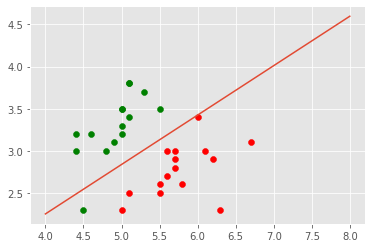

In [57]:
def gradient(x,y,weight):
    theta_d_x = x.dot(weight)                                              
    sig_h = 1/(1 + np.exp(-1*(theta_d_x)))
    return -1*((y-sig_h)*x).sum(axis=0).reshape(-1,1)


def gradient_descent(x, y, gradient, init_weight, learn_rate, n_iter=40000, tolerance=1e-6):
    weight = init_weight
    for _ in range(n_iter):
        diff = -learn_rate * gradient(x, y, weight)
        if np.all(np.abs(diff) <= tolerance):
            break
        weight += diff
    return weight

theta0 = 0.001; theta1 = 0.001; theta2 = 0.001
init_weight = np.array([[theta0], [theta1], [theta2]])
final_weights = gradient_descent(train_X, train_y, gradient, init_weight, 1e-5)
decision_boundary = (np.linspace(4,8,50),-1*(final_weights[1]/final_weights[2])*np.linspace(4,8,50)-(final_weights[0]/final_weights[2]))

print(f'theta0 = {final_weights[0]}, theta1 = {final_weights[1]}, theta2 = {final_weights[2]}')
plt.plot(decision_boundary[0], decision_boundary[1])
plt.scatter(test['x1'][:15], test['x2'][:15], c='g')
plt.scatter(test['x1'][15:], test['x2'][15:], c='r')
plt.show()

## use a gradient descent method to solve it and report the test error on the test dataset ‘test.mat.’ (percentage of misclassified test samples)

In [58]:
from sklearn.metrics import accuracy_score
theta_d_x = test_X.dot(final_weights)                                              
pred = 1/(1 + np.exp(-1*(theta_d_x)))
pred = np.round(pred, decimals=0)
print(f'accuracy: {accuracy_score(test_y, pred)}, error: {1-accuracy_score(test_y, pred)}')

accuracy: 0.9666666666666667, error: 0.033333333333333326


### <font color='gray'>check the result of using sklearn</font>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(train_X,train_y)
print(model.coef_)
print(accuracy_score(test_y,model.predict(test_X)))

[[ 6.36289705e-06 -2.58940281e+00  2.70528217e+00]]
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# 2.
# Download the MNIST dataset using the following example code:
# Please randomly choose 1,000 different handwritten images from either the training or the testing dataset to construct your own dataset, where each digit has 100 data samples.

## 2.1 Use the following code to show 50 images in your own dataset.

In [1]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
# input image dimensions 28x28
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


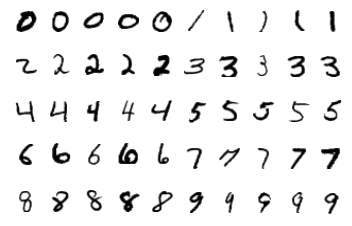

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def gen_1000_pic(x, y):
    for i in range(10): 
        ind = np.where(y==i)
        if i == 0:
            ind_chosen = np.random.choice(ind[0], 100)
            new_X = x[ind_chosen]
            new_y = y[ind_chosen]
        else:
            ind_chosen = np.random.choice(ind[0], 100)
            new_X = np.concatenate((new_X,x[ind_chosen]), axis=0)
            new_y = np.concatenate((new_y,y[ind_chosen]), axis=0)
    return new_X, new_y

def print_pic(x):
    amount= 50; lines = 5; columns = 10; number = np.zeros(amount)

    for i in range(amount):
        number[i] = y_test[i]

    fig = plt.figure()

    for i in range(amount):
        ax = fig.add_subplot(lines, columns, 1 + i)
        plt.imshow(x[i*20,:,:], cmap='binary')
        plt.sca(ax)
        ax.set_xticks([], [])
        ax.set_yticks([], [])

    plt.show()
    
x_train,y_train = gen_1000_pic(x_train, y_train)
print_pic(x_train)

## 2.2. Normalize the data (subtracting the mean from it and then dividing it by the standard deviation) and compute the eigenpairs for the covariance of the data (sorted in a descending order based on eigenvalues).

In [100]:
x_train = x_train.reshape(-1,784)
print(x_train.shape,x_train.mean(axis=0).shape)
x_train_cm = np.divide(x_train - x_train.mean(axis=0),
                       x_train.std(axis=0),
                       out = np.zeros_like(x_train),
                       where=x_train.std(axis=0)!=0)
cov_mat = x_train_cm.transpose().dot(x_train_cm)
eig_val, eig_vector = np.linalg.eig(cov_mat)
sort_ind = np.argsort(eig_val)[::-1]
eig_val = eig_val[sort_ind]
eig_vector = eig_vector[:,sort_ind]
print(eig_val.shape, eig_vector.shape)
display(eig_val[:5], eig_vector[:,:5])

(1000, 784) (784,)
(784,) (784, 784)


array([41206.996, 31398.426, 26846.172, 21155.69 , 18570.508],
      dtype=float32)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

## 2.3. Please project the 1000 randomly chosen images with 784 dimensions to two dimensions using PCA. Please use different colors or shapes to depict different digits on the plot with a legend.

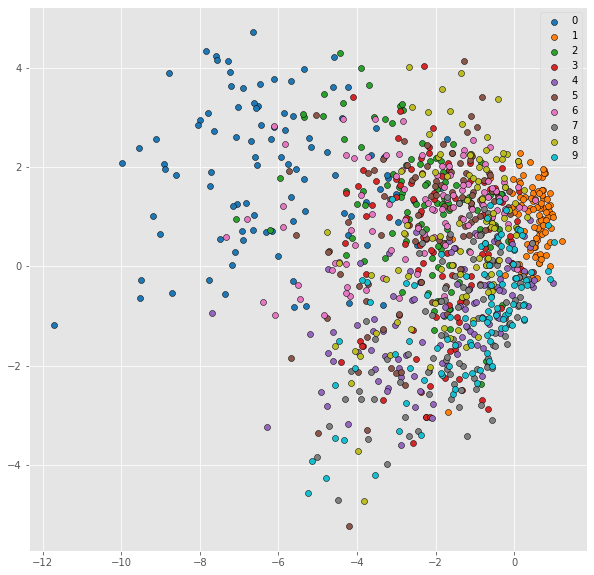

In [101]:
pca_trans_mat = eig_vector[:,:2] 
tmp = np.dot(x_train,pca_trans_mat)

# Plot the training points
plt.figure(1, figsize=(10, 10))
plt.clf()
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
for i in range(10):
    plt.scatter(tmp[i*100:(i+1)*100, 0], tmp[i*100:(i+1)*100, 1], c=colors[i], edgecolor="k", label=f'{i}')
plt.legend()

### <font color='gray'>check the result of using sklearn</font>

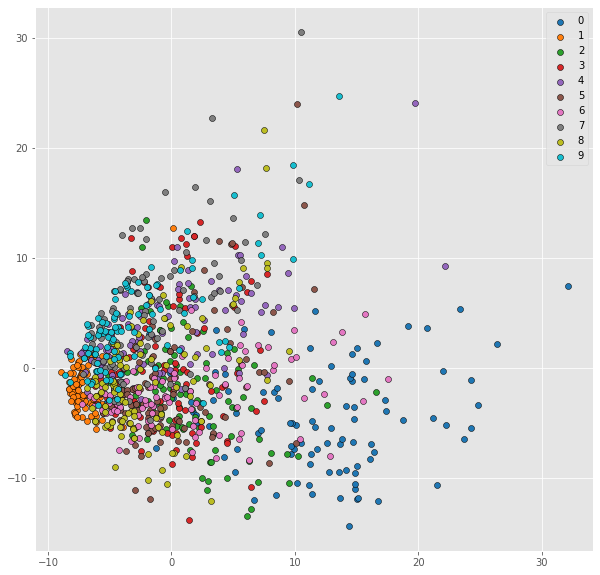

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

model = PCA(n_components=2)
tmp = model.fit_transform(x_train_cm)

# Plot the training points
plt.figure(1, figsize=(10, 10))
plt.clf()
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
for i in range(10):
    plt.scatter(tmp[i*100:(i+1)*100, 0], tmp[i*100:(i+1)*100, 1], c=colors[i], edgecolor="k", label=f'{i}')
plt.legend()

###  確認前十個基底向量長什麼樣子（圖像化），並確認需要用幾個新的基底向量才能組成清晰的數字圖片，用幾個新的基底向量才能組成清晰的表情圖片

#### 將前10個基底向量(eigen vector)改為圖像表示((1,784) -> (28,28))

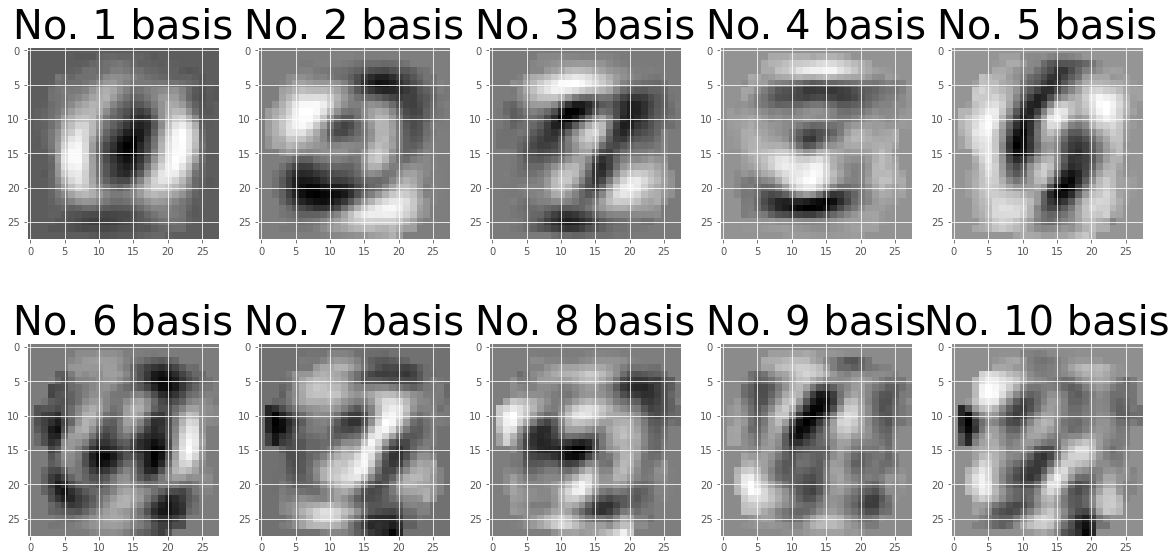

In [122]:
def print_eigv_pic(x):
    amount= 10; lines = 2; columns = 5; number = np.zeros(amount)

    fig = plt.figure(figsize=(20,10))

    for i in range(amount):
        ax = fig.add_subplot(lines, columns, 1 + i)
        plt.imshow(x[i], cmap='binary')
        plt.title(f'No. {i+1} basis', fontsize=40)
        plt.sca(ax)
    plt.show()
    
def gen_eigv_pic(x):
    new_X = []
    for i in range(10): 
            new_X.append(x[:,i].reshape(28,28))
    return new_X
    
print_eigv_pic(gen_eigv_pic(eig_vector[:,:10]))

#### 將第一張圖片投影到前兩個基底向量(eigen vector) => 得到兩個係數，這兩個係數分別代表第一張圖片在相對應的基底向量上的長度 

[-7.8321495  4.34209  ]


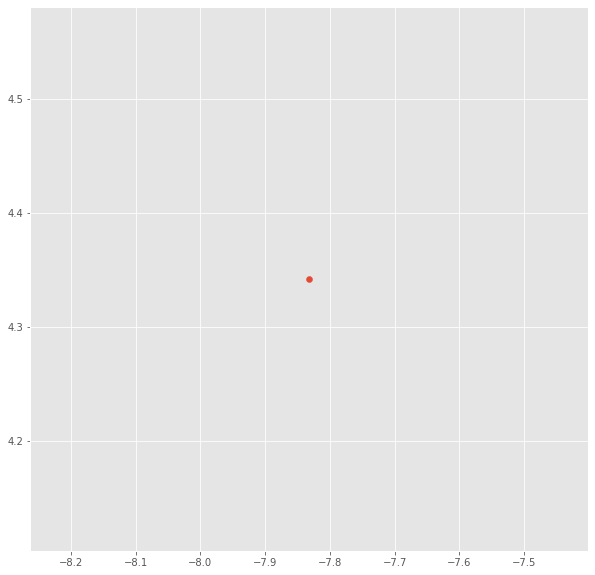

In [118]:
pca_trans_mat = eig_vector[:,:2] 
tmp = np.dot(x_train[0],pca_trans_mat)
print(tmp)

# Plot the training points
plt.figure(1, figsize=(10, 10))
plt.scatter(tmp[0], tmp[1])
plt.show()

#### 需要用幾個新的基底向量才能組成清晰的數字圖片

coef : [-4.46269464e+00  6.48946613e-02 -1.47655606e+00  2.30020094e+00
  1.24258614e+00 -4.38482672e-01 -2.12342882e+00 -7.61838198e-01
  7.40707874e-01  9.99709010e-01 -1.87152338e+00 -1.16318956e-01
 -1.18217885e-01 -2.36383820e+00 -2.76967824e-01 -9.25804377e-02
  9.03384447e-01 -8.04181695e-02  2.93306917e-01  1.97244912e-01
 -2.81486958e-01 -1.12946320e+00  7.06427753e-01  9.50554013e-03
 -5.50396666e-02  8.24919462e-01 -1.40570641e-01  2.64999866e-02
 -1.56580329e+00  6.95868850e-01  1.15836009e-01 -3.83660495e-01
 -3.20819497e-01  8.71136189e-02 -3.60177159e-02 -4.14647222e-01
  6.52855515e-01  7.15136290e-01 -7.91439414e-01  4.63120878e-01
  5.59041619e-01  5.71177661e-01  7.05072224e-01  2.49625742e-03
 -1.61749899e-01  2.83213645e-01  1.37692070e+00 -2.54279375e-01
 -5.72191060e-01 -9.93603289e-01 -1.11416265e-01  9.79733169e-02
  1.01253271e+00  3.71154875e-01 -6.69939756e-01  4.23809886e-01
 -1.37093997e+00  1.02287686e+00 -8.69253993e-01  5.13217628e-01
  1.26285344e-01  

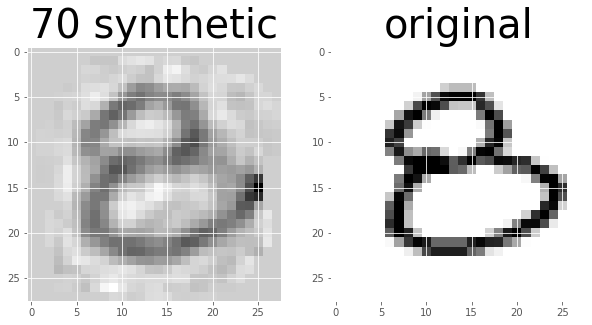

In [134]:
def syn_ori_compare(pic:np.array, eig_vector:np.array, syn_num:int = 10) -> (None):
    # pic : input picture
    # eig_vector : basis vector
    # syn_num : how many basis to take
    
    pca_trans_mat = eig_vector[:,:syn_num]
    coef = np.dot(pic,pca_trans_mat) # 求出原始圖片在前k個basis上的長度(或稱係數)
    print(f'coef : {coef}')
    k_sum_pic = np.zeros((28,28))
    for i in range(syn_num):
        tmp_pic = (coef[i]*pca_trans_mat[:,i]).reshape(28,28) #  係數乘上相對應的basis，並轉成圖片
        k_sum_pic += tmp_pic # 將乘上係數的basis加總起來
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.imshow(k_sum_pic, cmap='binary')
    ax1.set_title(f'{i+1} synthetic', fontsize=40)
    ax2.imshow(pic.reshape(28,28), cmap='binary')
    ax2.set_title(f'original', fontsize=40)
    plt.show()
    
syn_ori_compare(x_train[850], eig_vector, 70)

#### 需要用幾個新的基底向量才能組成清晰的表情圖片

coef : [-2.55761133e+03 -3.72754425e+02 -2.35737778e+02  4.33496216e+02
 -4.75953857e+02  1.46154785e+03 -1.22596191e+03 -7.12395447e+02
  9.11590637e+02  2.95418091e+02 -6.17513123e+02 -1.23183032e+03
 -1.17591217e+02  7.92690506e+01 -2.55845222e+01  1.39315659e+02
  5.41543091e+02  4.01859161e+02  1.43203552e+02 -3.11183594e+02
  1.27546310e+02  5.75776611e+02  3.09872055e+01 -5.69551758e+02
  4.49546509e+02  2.22652206e+01  8.86833420e+01  3.79885376e+02
  2.51097076e+02  8.72947311e+01 -1.37605469e+02 -4.08316559e+02
  8.78192902e+01 -3.49742661e+01 -2.56882141e+02  2.57344421e+02
 -6.75401611e+02  7.78013184e+02 -7.55285187e+01 -1.01526810e+02
  4.49391663e+02  1.78658508e+02 -4.84031906e+01 -1.51130920e+02
 -2.50180206e+01  1.29470016e+02  3.49172913e+02 -4.12671631e+02
 -3.58860779e+02  1.39933716e+02 -5.82774536e+02 -5.24391907e+02
  7.52462585e+02  8.76783066e+01  7.05010834e+01 -6.36159851e+02
  1.55188370e+01  4.93491882e+02  9.26847229e+01  3.63432190e+02
  5.70178101e+02 -

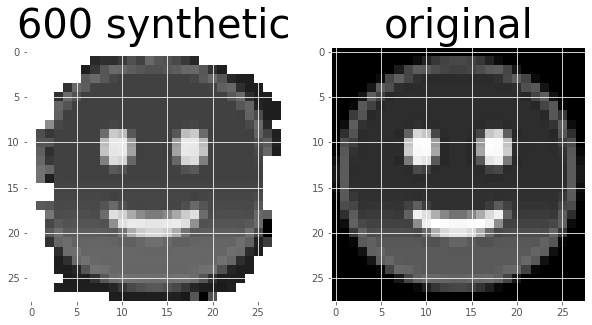

In [135]:
from PIL import Image, ImageOps
import PIL
import numpy as np

img = Image.open("f4.jpeg").resize((28,28))
img = ImageOps.grayscale(img)
face_pic = np.array(img).reshape(784)

syn_ori_compare(face_pic, eig_vector, 600) #  因為這些basis所良深打ㄗ


# 3. The dataset contains a log of network activities from two users (named 'P' and 'R'). An activity has eight different features (Field 1~8), which include categorical and numerical data. Our goal is to predict the user based on its activity record. Please use logistic regression to train a model on the training dataset (“PBP_train.csv”) and then test it on “PBP_test.csv.” The test results and accuracy need to be included in the report.

### import data

In [136]:
import pandas as pd
ori_train = pd.read_csv('PBP_train.csv', parse_dates=['Field 6'], infer_datetime_format=True)
ori_test = pd.read_csv('PBP_test.csv', parse_dates=['Field 6'], infer_datetime_format=True)
x_train = ori_train.drop('Name', axis=1)
y_train = ori_train['Name']
x_test = ori_test.drop('Name', axis=1)
y_test = ori_test['Name']

### one-hot encoding 

In [137]:
pre_data = pd.concat([x_train,x_test])
pre_data_f1 = pd.get_dummies(pre_data['Field 1'])
pre_data_f2 = pd.get_dummies(pre_data['Field 2'])
pre_data_f6 = pre_data['Field 6'].dt.hour*3600 + pre_data['Field 6'].dt.minute*60 + pre_data['Field 6'].dt.second
pre_data = pre_data.drop(['Field 1', 'Field 2'], axis=1)
pre_data['Field 6'] = pre_data_f6
pre_data = pd.concat([pre_data, pre_data_f1, pre_data_f2],axis=1)
x_train = pre_data[:-20]
x_test = pre_data[-20:]
y_train = pd.Categorical(y_train).codes

### drop null values

In [138]:
not_null_ind = x_train['Field 5'][x_train['Field 5'].notnull()].index
x_train = x_train.iloc[not_null_ind,:]
y_train = y_train[not_null_ind]
x_train.head()

,Field 3,Field 4,Field 5,Field 6,Field 7,Field 8,T1A98,T38F9,T6049,T6627,...,TB4A4,TC25C,TC2F3,TCD89,TCE31,TD64F,TDC33,TE40A,TEDC8,TFF88
0,0,1,1.0,34800,66,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1.0,33240,68,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1.0,32400,56,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1.0,30660,43,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2.0,30420,43,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### use logistic regression to train a model on the training dataset (“PBP_train.csv”) and then test it on “PBP_test.csv.”

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(C=1, tol=1e-10, max_iter=5000, solver='newton-cg', warm_start=True, penalty='none', verbose=1, random_state=0,n_jobs=2)
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
print(f'acc on train data: {accuracy_score(y_train, train_pred)}, predition on test data: {test_pred}')

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


acc on train data: 0.6691753402722178, predition on test data: [1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.1s finished


### <font color='gray'>try other model by sklearn</font>

In [20]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(x_train, y_train)
pred = model.predict(x_train)
accuracy_score(y_train, pred)

0.6073658927141713

In [15]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_train)
accuracy_score(y_train, pred)

0.6073658927141713

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_train)
accuracy_score(y_train, pred)

1.0

In [17]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_train)
accuracy_score(y_train, pred)

1.0

In [18]:
from sklearn.ensemble import AdaBoostClassifier 
model = AdaBoostClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_train)
accuracy_score(y_train, pred)

0.688550840672538